# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [21]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [23]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [24]:
# Create a Beautiful Soup Object
html = browser.html
soup_obj = soup(html, "html.parser")

In [25]:
# Extract all rows of data
mars_data = soup_obj.find_all("tr", class_ = "data-row")
mars_data

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [26]:
# Create an empty list
list = []
# Loop through the scraped data to create a list of rows
for data in mars_data:
    # Create an empty list to append to 
    row_data = []
    # Create another for loop to grab all elements starting with "td" tag to make a row of data
    for td in data.select("td"):
        # Add element to list
        row_data.append(td.text)
    # Add the row data to the table data
    list.append(row_data)



In [27]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(list, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [28]:
# Confirm DataFrame was created successfully
df.sample(n=5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1342,1369,2016-09-01,1448,214,8,-69.0,841.0
1731,1761,2017-10-11,1842,72,3,-79.0,869.0
1312,1338,2016-08-02,1418,196,7,-73.0,793.0
1633,1660,2017-07-02,1743,27,1,-78.0,863.0
1857,1886,2018-02-18,1968,131,5,-76.0,732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [29]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [30]:
# Change data types for data analysis
# I used the following website to help me with the datetime conversion:
# How to convert numpy DATETIME64 [NS] to python datetime?. Stack Overflow. (1965, May 1). https://stackoverflow.com/questions/52982056/how-to-convert-numpy-datetime64-ns-to-python-datetime 
df = df.astype({"terrestrial_date" : "datetime64[ns]",
                "sol" : "int64",
                "ls" : "int64",
                "month" : "int64",
                "min_temp" : float,
                "pressure" : float})

In [31]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [32]:
# 1. How many months are there on Mars?
df["month"].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

There are about 12 months on Mars.

In [33]:
# 2. How many Martian days' worth of data are there?
len(df)

1867

There are 1867 Martian days' worth of data.

In [34]:
# 3. What is the average low temperature by month?
avg_low = df.groupby('month')['min_temp'].mean()
avg_low

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<Axes: xlabel='Month', ylabel='Temperature in Celsius'>

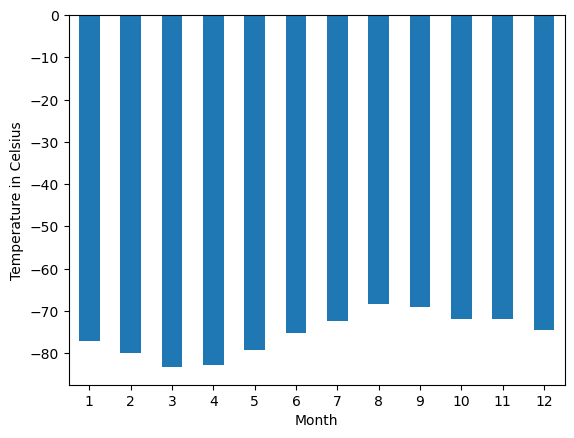

In [35]:
# Plot the average temperature by month
avg_low.plot.bar(xlabel="Month", ylabel="Temperature in Celsius",
                 legend = False, rot = 0)

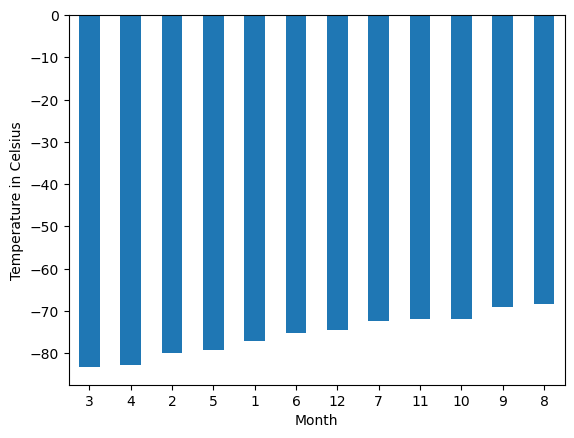

In [36]:
# Identify the coldest and hottest months in Curiosity's location
# Sort the data in ascending order of average minimum temperature
sort_avg = avg_low.sort_values(ascending=True)

# Plot the bar chart
sort_avg.plot.bar(xlabel="Month", ylabel="Temperature in Celsius",
                  legend=False, rot=0)

# Display the plot
plt.show()

The third month, on average, had the lowest average minimum daily temperature. The eigth month, on average, had the warmest average minimum daily temperature for all months. 

In [37]:
# 4. Average pressure by Martian month
# Group the data by Martian month and calculate the average pressure
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Sort the data by month (optional, but it helps plot the months in chronological order)
average_pressure_by_month = average_pressure_by_month.sort_index()
average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: xlabel='Month', ylabel='Atmospheric Pressure'>

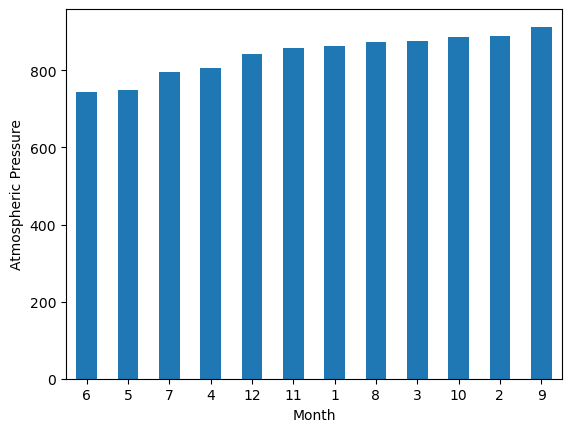

In [38]:
# Plot the average pressure by month
# Sort values
sort_pressure = average_pressure_by_month.sort_values(ascending=True)
# Plot the bar chart
sort_pressure.plot.bar(xlabel="Month", ylabel="Atmospheric Pressure",
                  legend=False, rot=0)

The sixth month had the lowest atmoshpheric pressure, while the ninth month had the highest.

Text(0, 0.5, 'Minimum temperature')

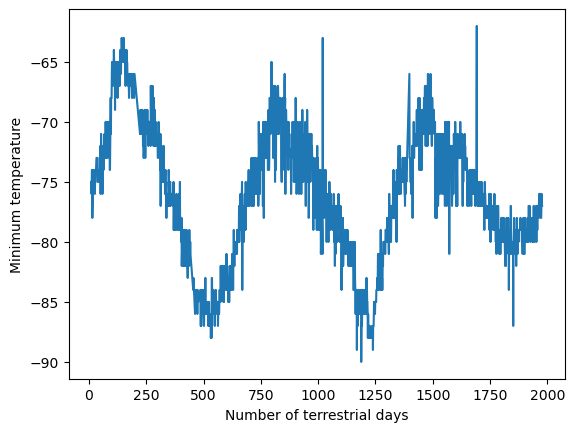

In [39]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(df["sol"], df["min_temp"])
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")

Looking between two troughs, we can extimate a year on Mars to be about 680 days (1200-520).

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [40]:
# Write the data to a CSV
df.to_csv("mars.csv", header=True, index=False)

In [41]:
browser.quit()